<img src="https://www.fatalerrors.org/images/blog/c6b544ae87e97d71cb450e434a8818a6.jpg" width="400px">

- apple width ≈ 6cm
- apple length ≈ 6cm
- banana width ≈ 4cm
- banana length ≈ 8cm

apple : 0

banana : 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
def genetare_dataset(n):
    apple_width = np.random.normal(6, 1, n)
    apple_length = np.random.normal(6, 1, n)
    banana_width = np.random.normal(4, 1, n)
    banana_length = np.random.normal(8, 1, n)

    width = np.concatenate((apple_width, banana_width))
    length = np.concatenate((apple_length, banana_length))
    X = np.array([width, length]).T

    Y_apples = np.zeros(n, dtype='int')
    Y_bananas = np.ones(n, dtype='int')
    Y = np.concatenate((Y_apples, Y_bananas))

    return X, Y

In [3]:
X_train, Y_train = genetare_dataset(100)

In [17]:
X_train

array([[ 7.64581747,  5.49769453],
       [ 5.75269762,  6.46496378],
       [ 6.8929929 ,  6.26906083],
       [ 7.09697556,  4.67704124],
       [ 5.61519344,  5.10460039],
       [ 3.60947725,  5.58816751],
       [ 5.25209962,  4.97319712],
       [ 5.27969974,  5.87824313],
       [ 6.02185811,  6.4050654 ],
       [ 6.02795377,  7.07732744],
       [ 7.27122243,  6.57276029],
       [ 5.86873607,  4.79169861],
       [ 5.74423766,  5.54473366],
       [ 6.03462034,  6.49740989],
       [ 5.53424651,  6.39116875],
       [ 5.42490953,  6.36500969],
       [ 4.13762781,  5.42948513],
       [ 7.42302685,  6.6427315 ],
       [ 6.34296064,  7.13156224],
       [ 5.00376663,  4.08635576],
       [ 7.19931159,  6.09254349],
       [ 7.57206474,  6.10081468],
       [ 7.24144058,  6.04489485],
       [ 5.72900288,  5.22598906],
       [ 7.61410503,  7.64181912],
       [ 6.18876666,  6.97809472],
       [ 5.36093818,  4.39344653],
       [ 5.22796583,  6.02537076],
       [ 6.26225417,

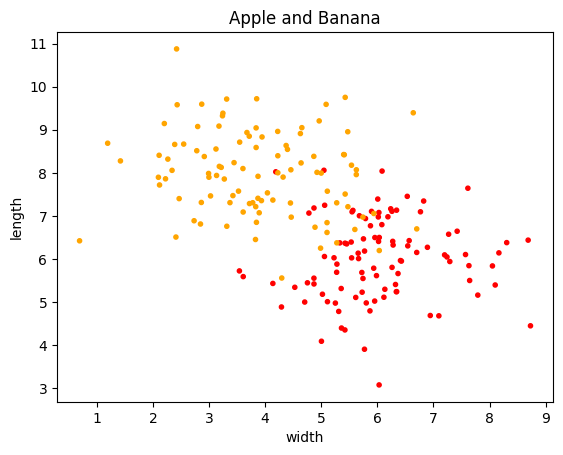

In [4]:
cmap = ['red', 'orange']
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=ListedColormap(cmap), marker='.')
plt.title('Apple and Banana')
plt.xlabel('width')
plt.ylabel('length')
plt.show()

In [5]:
from knn import KNN

In [6]:
knn = KNN(k=5)
knn.fit(X_train, Y_train)

In [7]:
new_fruit = np.array([3, 8.4])
new_fruit_2 = np.array([6, 6])
new_fruit_3 = np.array([4, 7])

new_fruits = [new_fruit, new_fruit_2, new_fruit_3]

In [8]:
outputs = knn.predict(new_fruits)
outputs

[5.47786427 3.36477479 4.43805086 5.53584958 4.20700551 2.87712782
 4.10060126 3.39945416 3.62096541 3.30423467 4.64565884 4.60971643
 3.96022553 3.5817272  3.23385348 3.16565503 3.18090484 4.75932338
 3.57551677 4.75632288 4.79151055 5.11761948 4.85142643 4.18590518
 4.67598155 3.49142484 4.65043007 3.25617809 4.16991553 3.10555881
 3.51649511 3.80616829 3.02286011 3.52080452 3.8329544  3.40698517
 5.64005052 4.94798954 2.3623039  5.66530625 4.47417286 3.84638608
 3.88389841 4.71989259 2.07653089 4.5985634  3.17295446 3.58258264
 4.07791105 4.48806852 1.24809684 3.80304947 4.42448661 5.78469002
 4.21542605 3.88394809 4.19402991 2.86491484 3.46674486 3.50841353
 6.96251682 4.60165653 2.8637631  3.53911063 4.11716035 3.99762568
 6.01811655 3.93240237 3.42061487 3.33746147 5.67863901 5.29206133
 3.65831426 3.49407102 3.17327644 3.47342224 3.98872149 3.11956916
 3.74701856 3.96890128 2.73378361 5.28376016 4.33273315 4.08522229
 2.22570378 4.53306495 4.4123239  3.14938539 3.30754601 3.4371

[1, 0, 1]

In [9]:
for output in outputs:
    if output == 0:
        print('🍎')
    else:
        print('🍌')

🍌
🍎
🍌


In [11]:
X_test, Y_test = genetare_dataset(90)

In [12]:
knn.evaluate(X_test, Y_test)

0.9055555555555556

In [ ]:
Y_pred = knn.predict(X_test)
Y_pred

In [61]:
confusion_matrix = np.zeros((2, 2))

for i in range(180):
    if Y_test[i] == 0 and Y_pred[i] == 0:
        confusion_matrix[0][0] += 1
    elif Y_test[i] == 0 and Y_pred[i] == 1:
        confusion_matrix[0][1] += 1
    elif Y_test[i] == 1 and Y_pred[i] == 0:
        confusion_matrix[1][0] += 1
    elif Y_test[i] == 1 and Y_pred[i] == 1:
        confusion_matrix[1][1] += 1

confusion_matrix

array([[86.,  4.],
       [12., 78.]])

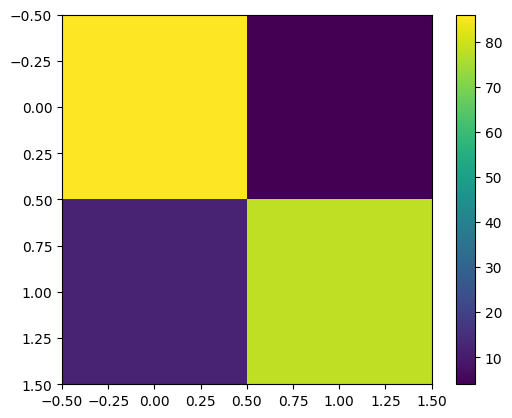

In [63]:
plt.imshow(confusion_matrix)
plt.colorbar()
plt.show()

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

knn.predict(new_fruits)

array([1, 0, 1])

In [15]:
knn.score(X_test, Y_test)

0.9055555555555556